# Data Wrangling - Netflix Analysis

## 1. Data cleaning / Wrangling

In [227]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

#### - Google Trend dataset cleaning

In [251]:
# read google trend excel file
trend = pd.read_csv('multiTimeline.csv')

#rename columns
trend= trend.rename(columns = {'netflix: (France)': '#search_mon_sum'})
trend= trend.rename(columns = {'Week': 'date'})

trend.head()

,date,#search_mon_sum
0,2017-02-12,20
1,2017-02-19,19
2,2017-02-26,18
3,2017-03-05,17
4,2017-03-12,16


In [252]:
# add a new colum that accumulate the monthly search counts
trend['new#search_mon_sum'] = trend['#search_mon_sum'].diff()
trend= trend.dropna()
trend.head()

,date,#search_mon_sum,new#search_mon_sum
1,2017-02-19,19,-1.0
2,2017-02-26,18,-1.0
3,2017-03-05,17,-1.0
4,2017-03-12,16,-1.0
5,2017-03-19,19,3.0


In [270]:
# sum the search number by months

trend2 = trend
trend2['date'] = pd.to_datetime(trend2['date'])
trend2.set_index(trend2['date'], inplace=True)
trend2 = trend2.resample('MS').sum()
trend2.head()

,#search_mon_sum,new#search_mon_sum
date,,
2017-02-01,37,-2.0
2017-03-01,69,-1.0
2017-04-01,102,4.0
2017-05-01,76,-4.0
2017-06-01,81,6.0


#### - Netflix dataset cleaning

In [271]:
# read netflix titles excel file
netflix = pd.read_csv('netflix_titles.csv')

# filter out with the only needed columns
netflix = netflix.filter(['date_added','type'], axis=1)

# remove the ones with missing date_added.
netflix = netflix.dropna()

netflix.head()

,date_added,type
0,"September 25, 2021",Movie
1,"September 24, 2021",TV Show
2,"September 24, 2021",TV Show
3,"September 24, 2021",TV Show
4,"September 24, 2021",TV Show


In [272]:
# change the date format
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
netflix.head()

,date_added,type
0,2021-09-25,Movie
1,2021-09-24,TV Show
2,2021-09-24,TV Show
3,2021-09-24,TV Show
4,2021-09-24,TV Show


In [273]:
# filter to get the titles that are added later than 2017-01-01
netflix = netflix.loc[(netflix['date_added'] >= '2017-01-01')]
netflix

,date_added,type
0,2021-09-25,Movie
1,2021-09-24,TV Show
2,2021-09-24,TV Show
3,2021-09-24,TV Show
4,2021-09-24,TV Show
...,...,...
8802,2019-11-20,Movie
8803,2019-07-01,TV Show
8804,2019-11-01,Movie
8805,2020-01-11,Movie


In [274]:
#group by the type and the added date and counted the number 
netflix1 = netflix.groupby(['type','date_added']).size().to_frame('size')
netflix1

size
type    date_added      
Movie   2017-01-01    11
        2017-01-03     1
        2017-01-04     1
        2017-01-05     3
        2017-01-06     4
...                  ...
TV Show 2021-09-17     4
        2021-09-21     1
        2021-09-22     6
        2021-09-23     1
        2021-09-24     7

[2246 rows x 1 columns]

- Covid Dataset Cleaning

In [275]:
# read covid dataset excel file
covid = pd.read_csv('synthese-fra.csv')
covid

,date,total_cas_confirmes,total_deces_hopital,total_deces_ehpad,total_cas_confirmes_ehpad,total_cas_possibles_ehpad,patients_reanimation,patients_hospitalises,total_patients_gueris,nouveaux_patients_hospitalises,nouveaux_patients_reanimation
0,2020-03-02,191.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,212.0,4,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
2,2020-03-04,285.0,4,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN
3,2020-03-05,423.0,7,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN
4,2020-03-06,613.0,9,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
702,2022-02-02,NaN,104185,27403.0,NaN,NaN,3700.0,32720.0,519409.0,3230.0,366.0
703,2022-02-03,NaN,104449,27403.0,NaN,NaN,3643.0,32852.0,521380.0,3091.0,310.0
704,2022-02-04,NaN,104804,27403.0,NaN,NaN,3618.0,32988.0,524878.0,4033.0,402.0
705,2022-02-05,NaN,104974,27403.0,NaN,NaN,3606.0,32867.0,526609.0,1816.0,225.0


In [276]:
# add new columns for counting the values different by the day before.
covid = pd.read_csv('synthese-fra.csv')
covid['new_patients_reanimation'] = covid['patients_reanimation'].diff()
covid['new_patients_hospitalises'] = covid['patients_hospitalises'].diff()
covid.head()

,date,total_cas_confirmes,total_deces_hopital,total_deces_ehpad,total_cas_confirmes_ehpad,total_cas_possibles_ehpad,patients_reanimation,patients_hospitalises,total_patients_gueris,nouveaux_patients_hospitalises,nouveaux_patients_reanimation,new_patients_reanimation,new_patients_hospitalises
0,2020-03-02,191.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,212.0,4,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN
2,2020-03-04,285.0,4,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,423.0,7,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,8.0,NaN
4,2020-03-06,613.0,9,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,16.0,NaN


In [277]:
# replace none values with 0
covid = covid.fillna(0)

In [278]:
# filter out with the daily counted columns
covid1= covid.filter(['date','new_patients_reanimation','new_patients_hospitalises','patients_reanimation','patients_hospitalises'])
covid1 = covid1.loc[(covid1['date'] <= '2022-01-31')]

covid1.head()

,date,new_patients_reanimation,new_patients_hospitalises,patients_reanimation,patients_hospitalises
0,2020-03-02,0.0,0.0,0.0,0.0
1,2020-03-03,0.0,0.0,0.0,0.0
2,2020-03-04,0.0,0.0,15.0,0.0
3,2020-03-05,8.0,0.0,23.0,0.0
4,2020-03-06,16.0,0.0,39.0,0.0


In [279]:
covid1['date'] = pd.to_datetime(covid1['date'])
covid1.set_index(covid1['date'], inplace=True)
covid1 = covid1.resample('MS').sum()
covid1.head()

,new_patients_reanimation,new_patients_hospitalises,patients_reanimation,patients_hospitalises
date,,,,
2020-03-01,4959.0,20178.0,42292.0,170469.0
2020-04-01,-1546.0,3526.0,178788.0,883986.0
2020-05-01,-2700.0,-11961.0,72168.0,619117.0
2020-06-01,-717.0,-5786.0,25730.0,325715.0
2020-07-01,-231.0,-3238.0,14477.0,208369.0


## 2. Data Merge 

In [280]:
#google trend per month and covid trend per month are merged on the date(month)
# They are both accumulating tables
m1 = pd.merge(trend2, covid1, how = 'left', on='date')

# before the outbreak of the covid, the covid values will be seen as 0.
m1 = m1.fillna(0)

m1.head()

,#search_mon_sum,new#search_mon_sum,new_patients_reanimation,new_patients_hospitalises,patients_reanimation,patients_hospitalises
date,,,,,,
2017-02-01,37,-2.0,0.0,0.0,0.0,0.0
2017-03-01,69,-1.0,0.0,0.0,0.0,0.0
2017-04-01,102,4.0,0.0,0.0,0.0,0.0
2017-05-01,76,-4.0,0.0,0.0,0.0,0.0
2017-06-01,81,6.0,0.0,0.0,0.0,0.0


## 3. Visualization

Text(0, 0.5, 'The number difference per month')

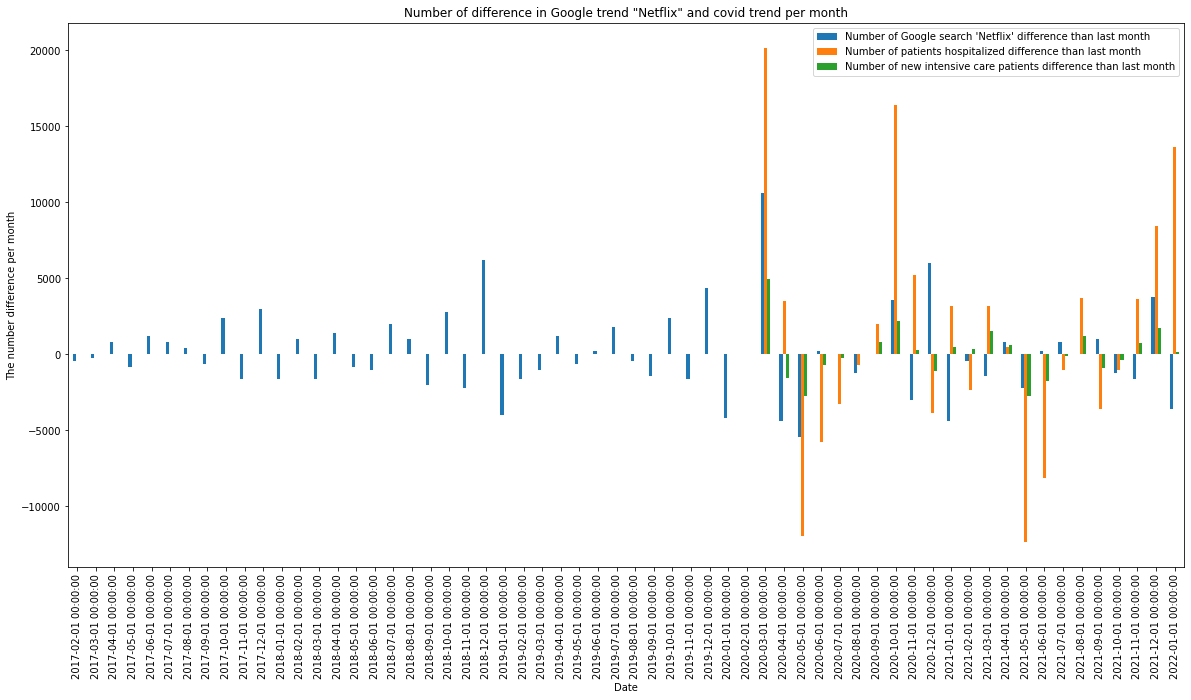

In [264]:
#Number of difference in Google trend "Netflix" and covid trend per month
v1 = m1.plot(y=['new#search_mon_sum', 'new_patients_hospitalises', 'new_patients_reanimation'], figsize=(20,10), kind ='bar',
             label=["Number of Google search 'Netflix' difference than last month", "Number of patients hospitalized difference than last month", "Number of new intensive care patients difference than last month"],
            title = 'Number of difference in Google trend "Netflix" and covid trend per month')
v1.set_xlabel("Date")
v1.set_ylabel("The number difference per month")

Text(0, 0.5, 'The number per month')

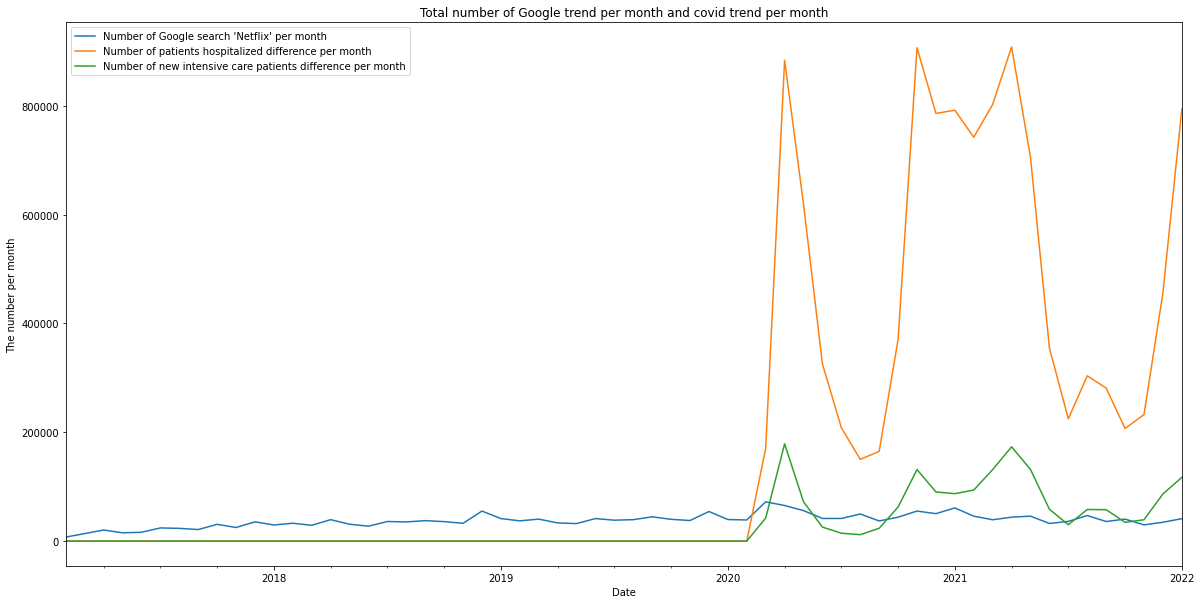

In [265]:
#Total number of Google trend per month and covid trend per month
v2 = m1.plot(y=['#search_mon_sum', 'patients_hospitalises', 'patients_reanimation'], figsize=(20,10), 
             label=["Number of Google search 'Netflix' per month", "Number of patients hospitalized difference per month", "Number of new intensive care patients difference per month"],
            title = 'Total number of Google trend per month and covid trend per month')
v2.set_xlabel("Date")
v2.set_ylabel("The number per month")

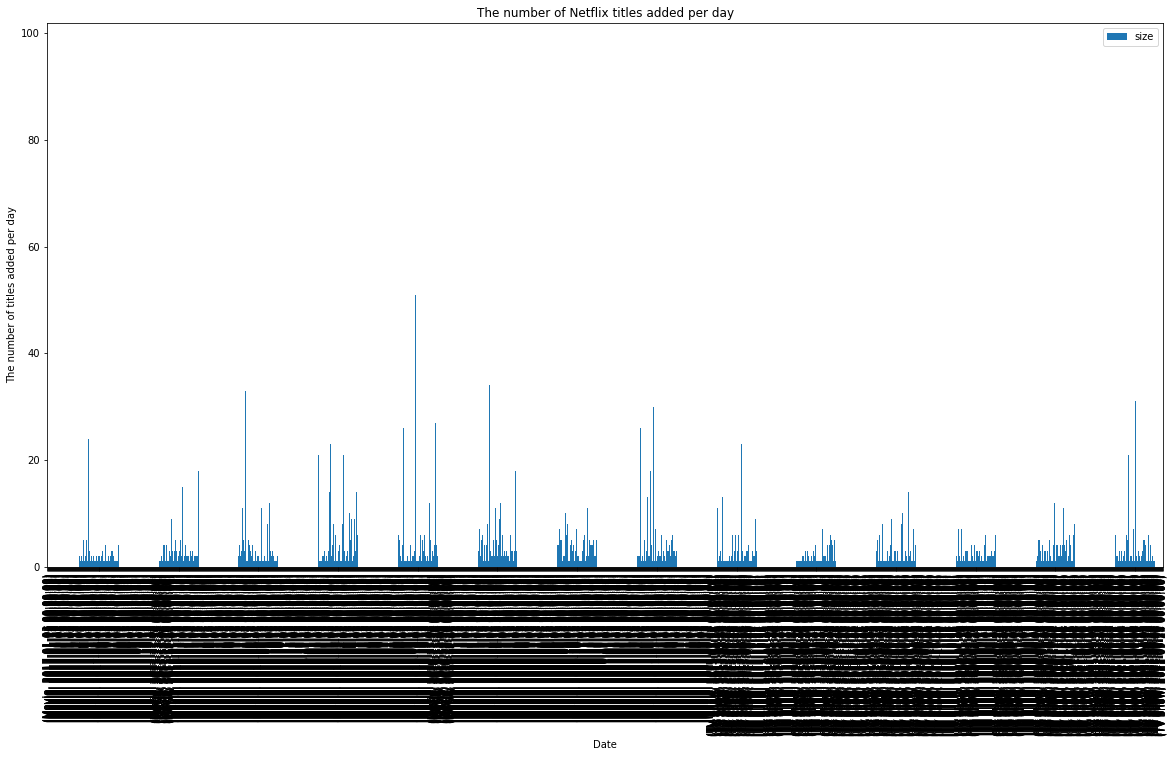

In [266]:
n1 = netflix1.plot(figsize=(20,10), kind ='bar', title = "The number of Netflix titles added per day")
x = m1['#search_mon_sum']
n1.set_ylabel("The number of titles added per day")
n1.set_xlabel("Date")

plt.show()

## 4. Analysis

In [281]:
import statsmodels.api as sm
H1 =  m1.filter(['#search_mon_sum', 'patients_hospitalises'])
R1 =  m1.filter(['#search_mon_sum', 'patients_reanimation'])


fit1 = sm.OLS(H1['patients_hospitalises'], sm.add_constant(H1['#search_mon_sum']*10)).fit()
fit2 = sm.OLS(R1['patients_reanimation'], sm.add_constant(H1['#search_mon_sum']*10)).fit()

print(fit1.params)
print(fit1.params)

const             -296555.996272
#search_mon_sum       258.247773
dtype: float64
const             -296555.996272
#search_mon_sum       258.247773
dtype: float64


In [282]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     patients_hospitalises   R-squared:                       0.275
Model:                               OLS   Adj. R-squared:                  0.262
Method:                    Least Squares   F-statistic:                     21.95
Date:                   Fri, 11 Feb 2022   Prob (F-statistic):           1.74e-05
Time:                           08:10:30   Log-Likelihood:                -831.28
No. Observations:                     60   AIC:                             1667.
Df Residuals:                         58   BIC:                             1671.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.966e+05   1.09e+05     -2.722      0.009   -5.15e+05   -7.85e+04
#search_mon_sum   258.2478     55.122      4.685      0.000     147.909     368.587
==============================================================================
Omnibus:                        5.924   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.632
Skew:                           0.750   Prob(JB):                       0.0598
Kurtosis:                       3.010   Cond. No.                     6.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [283]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     patients_reanimation   R-squared:                       0.251
Model:                              OLS   Adj. R-squared:                  0.238
Method:                   Least Squares   F-statistic:                     19.41
Date:                  Fri, 11 Feb 2022   Prob (F-statistic):           4.60e-05
Time:                          08:10:32   Log-Likelihood:                -722.44
No. Observations:                    60   AIC:                             1449.
Df Residuals:                        58   BIC:                             1453.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.536e+04   1.78e+04     -2.554      0.013   -8.09e+04   -9812.434
#search_mon_sum    39.5909      8.985      4.406      0.000      21.605      57.577
==============================================================================
Omnibus:                       14.752   Durbin-Watson:                   0.598
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.277
Skew:                           1.162   Prob(JB):                     0.000292
Kurtosis:                       4.056   Cond. No.                     6.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""